### **1. TEXT PREPROCESSING**

In [36]:
import pandas as pd

# Read both csv files into the program
orig_credits_data = pd.read_csv('/home/OriginalData/credits.csv')
orig_title_data = pd.read_csv('/home/OriginalData/titles.csv')


In [37]:
import pandas as pd
import re

# Create suitable text cleaning functions

def clean_string(string):
    ''' Turns a string into all lower case and only alphabetical letters and numbers '''
    clean = str(string).lower()
    clean = re.sub(r'[^a-zA-Z0-9\s]', '', clean)
    clean = re.sub(r'\s+', ' ', clean)
    return clean

def clean_string_character(string):
    ''' Turns a string into all lower case and only alphabetical letters and numbers. 
    Also removes the '(uncredited)' tag, and seperates each character that an actor plays
    by putting the characters into a list
    This function is designed to handle only the 'character' column'''

    clean = str(string).lower()
    if '(uncredited)' in clean:
        clean = clean.replace('(uncredited)', '')
    clean = re.sub(r'[^a-zA-Z0-9/\s]', '', clean)
    clean = re.sub(r'\s+', ' ', clean)

    character = ''
    characters = []
    for char in clean:
        if char == '/':
            characters.append(character.strip())
            character = ''
        else:
            character = character + char
    characters.append(character.strip())
    return characters

# MAKING SURE THE COUNTRY CODES ARE VALID
# list of all valid country codes
country_codes = [
    "AD", "AE", "AF", "AG", "AI", "AL", "AM", "AO", "AQ", "AR", "AS", "AT", "AU", "AW", "AX", "AZ", "BA", "BB", "BD",
    "BE", "BF", "BG", "BH", "BI", "BJ", "BL", "BM", "BN", "BO", "BQ", "BR", "BS", "BT", "BV", "BW", "BY", "BZ", "CA",
    "CC", "CD", "CF", "CG", "CH", "CI", "CK", "CL", "CM", "CN", "CO", "CR", "CU", "CV", "CW", "CX", "CY", "CZ", "DE",
    "DJ", "DK", "DM", "DO", "DZ", "EC", "EE", "EG", "EH", "ER", "ES", "ET", "FI", "FJ", "FK", "FM", "FO", "FR", "GA",
    "GB", "GD", "GE", "GF", "GG", "GH", "GI", "GL", "GM", "GN", "GP", "GQ", "GR", "GS", "GT", "GU", "GW", "GY", "HK",
    "HM", "HN", "HR", "HT", "HU", "ID", "IE", "IL", "IM", "IN", "IO", "IQ", "IR", "IS", "IT", "JE", "JM", "JO", "JP",
    "KE", "KG", "KH", "KI", "KM", "KN", "KP", "KR", "KW", "KY", "KZ", "LA", "LB", "LC", "LI", "LK", "LR", "LS", "LT",
    "LU", "LV", "LY", "MA", "MC", "MD", "ME", "MF", "MG", "MH", "MK", "ML", "MM", "MN", "MO", "MP", "MQ", "MR", "MS",
    "MT", "MU", "MV", "MW", "MX", "MY", "MZ", "NA", "NC", "NE", "NF", "NG", "NI", "NL", "NO", "NP", "NR", "NU", "NZ",
    "OM", "PA", "PE", "PF", "PG", "PH", "PK", "PL", "PM", "PN", "PR", "PS", "PT", "PW", "PY", "QA", "RE", "RO", "RS",
    "RU", "RW", "SA", "SB", "SC", "SD", "SE", "SG", "SH", "SI", "SJ", "SK", "SL", "SM", "SN", "SO", "SR", "SS", "ST",
    "SV", "SX", "SY", "SZ", "TC", "TD", "TF", "TG", "TH", "TJ", "TK", "TL", "TM", "TN", "TO", "TR", "TT", "TV", "TW",
    "TZ", "UA", "UG", "UM", "US", "UY", "UZ", "VA", "VC", "VE", "VG", "VI", "VN", "VU", "WF", "WS", "YE", "YT", "ZA",
    "ZM", "ZW"
]

def clean_country_code(country_codes, country_list):
    country_list_new = country_list
    for country in country_list:
        if country not in country_codes:
            country_list_new.remove(country)
        # It was noticed that there was a problem with an entry that has 'Lebanon'
        # instead of 'LB'
        elif country == 'Lebanon':
            country_list_new.remove(country)
            country_list_new.append("LB")
    return country_list_new

# Changing classifications into only G, PG, M, MA and R
suitable_certifications = ['g', 'pg', 'm', 'ma', 'r']

def clean_certification(suitable_certifications, age_certification):
    cleaned_age_certification = age_certification

    # Do nothing if the classification is already clean
    if age_certification in suitable_certifications:
        return cleaned_age_certification

    # If the rating strats with 'tv'
    elif (age_certification[0] == 't') and (age_certification[1] == 'v'):
        # If next is a y or g it will have a rating G
        if (age_certification[2] == 'g') or (age_certification[2] == 'y'):
            cleaned_age_certification == 'g'
        # If next is a p or 1 it will have a rating PG
        elif (age_certification[2] == 'p') or (age_certification[2] == '1'):
            cleaned_age_certification == 'pg'
        # If next is ma it will have a rating MA
        elif (age_certification[2] == 'm') and (age_certification[3] == 'a'):
            cleaned_age_certification == 'ma'
        # If next is m it will have a rating M
        elif age_certification[2] == 'm':
            cleaned_age_certification == 'm'
        # If next is r it will have a rating R
        elif age_certification[2] == 'r':
            cleaned_age_certification == 'r'
        # If not in a suitable form, leave it blank
        else:
            cleaned_age_certification == ''
    # If the classification is something else, delete it
    else:
        cleaned_age_certification == ''
    
    return cleaned_age_certification


In [38]:

# Apply suitable text cleaning functions
cleaned_credits_data = orig_credits_data
cleaned_title_data = orig_title_data

# Give appropriate column titles
cleaned_credits_data.rename(columns={'id': 'media_id', 'name': 'person_name'}, inplace=True)
cleaned_title_data.rename(columns={'id': 'media_id', 'title': 'media_title', 'type': 'media_type', 
    'description': 'media_description'}, inplace=True)

# Cleaning relevant columns
cleaned_title_data['media_title'] = cleaned_title_data['media_title'].apply(lambda x: clean_string(x))
cleaned_title_data['media_type'] = cleaned_title_data['media_type'].apply(lambda x: clean_string(x))
cleaned_title_data['media_description'] = cleaned_title_data['media_description'].apply(lambda x: clean_string(x))
cleaned_title_data['age_certification'] = cleaned_title_data['age_certification'].apply(lambda x: clean_string(x))

cleaned_title_data['genres'] = cleaned_title_data['genres'].apply(lambda x: re.sub(r"[\[\]' ]", "", str(x)).split(","))
cleaned_title_data['production_countries'] = cleaned_title_data['production_countries'].apply(lambda x: re.sub(r"[\[\]' ]", "", str(x)).split(","))


cleaned_title_data['production_countries'] = cleaned_title_data['production_countries'].apply(lambda x: clean_country_code(country_codes, x))
cleaned_title_data['age_certification'] = cleaned_title_data['age_certification'].apply(lambda x: clean_certification(suitable_certifications, x))

cleaned_credits_data['person_name'] = cleaned_credits_data['person_name'].apply(lambda x: clean_string(x))
cleaned_credits_data['role'] = cleaned_credits_data['role'].apply(lambda x: clean_string(x))
cleaned_credits_data['person_name'] = cleaned_credits_data['person_name'].apply(lambda x: clean_string(x))
cleaned_credits_data['character'] = cleaned_credits_data['character'].apply(lambda x: clean_string_character(x))

In [39]:
#Export cleaned data files
cleaned_title_data.to_csv('/home/CleanedData/cleaned_title_data.csv', index = False)
cleaned_credits_data.to_csv('/home/CleanedData/cleaned_credits_data.csv', index = False)

In [40]:
# ONE HOT ENCODING ON THE GENRE COLUMN - NOTE THAT WE NEED TO SHIFT DATA IMPUTATION BEFORE THIS
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

df = pd.read_csv('/home/CleanedData/cleaned_title_data_imputed.csv')  

column_to_encode = 'genres'

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Apply one-hot encoding and join the resulting dataframe with the original
df_encoded = pd.DataFrame(mlb.fit_transform(df[column_to_encode].apply(eval)), 
                           columns=mlb.classes_,
                           index=df.index)

# Drop the original column
#df.drop(column_to_encode, axis=1, inplace=True)

# Concatenate one-hot encoded dataframe with the original Df
df = pd.concat([df, df_encoded], axis=1)
df.drop('', axis=1, inplace=True)

# Save the dataframe to a new CSV file
output_file = '/home/CleanedData/genre_encoded_data.csv'
df.to_csv(output_file, index=False)


### **2. EXPLORATORY DATA ANALYSIS**

**Boxplot of IMDb score**

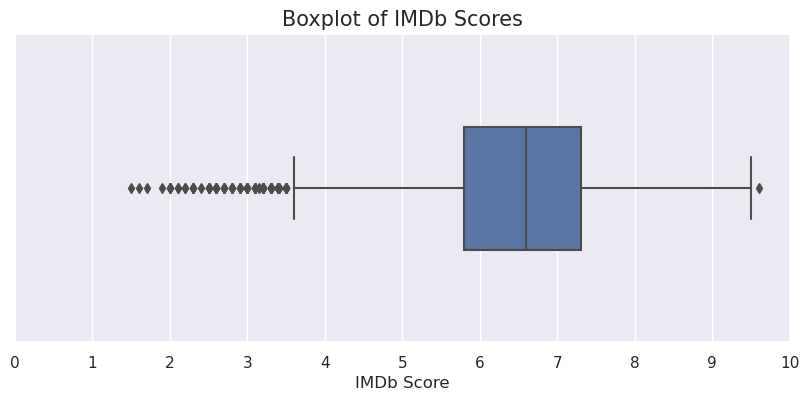

Mean =  6.510822476159073
Median =  6.6
Mode =  0    6.5
Name: imdb_score, dtype: float64
Min =  1.5
Max =  9.6
Std Dev =  1.1409312649262873
q1: 5.8
q3: 7.3
IQR: 1.5
lower bound: 3.55
upper bound: 9.55
Number of outliers (IMDb): 93


In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('/home/CleanedData/cleaned_title_data_imputed.csv')
imdb_data = df['imdb_score']


sns.set(rc={'figure.figsize':(10,4)})
ax = sns.boxplot(df['imdb_score'], width=0.4, fliersize = 5, orient='h')

# set label and title
ax.set_xlabel("IMDb Score", fontsize=12)
ax.set(xlim=(0, 10))
ax.set_xticks(range(0,11))
ax.set_title('Boxplot of IMDb Scores', fontsize=15)
ax.axes.get_yaxis().set_visible(False)


# save the bixplot
plt.savefig('/home/Figures/imdb_score_boxplot.png')
plt.show()

# Calculate descriptive statistics
mean_score = imdb_data.mean()
median_score = imdb_data.median()
mode_score = imdb_data.mode()
min_score = imdb_data.min()
max_score = imdb_data.max()
std_dev = imdb_data.std()
print("Mean = ", mean_score)
print("Median = ", median_score)
print("Mode = ", mode_score)
print("Min = ", min_score)
print("Max = ", max_score)
print("Std Dev = ", std_dev)

# Calculate the number of outliers
q1 = imdb_data.quantile(0.25)
q3 = imdb_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = imdb_data[(imdb_data < lower_bound) | (imdb_data > upper_bound)]
num_outliers = len(outliers)
print("q1:", q1)
print("q3:", q3)
print("IQR:", iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
print("Number of outliers (IMDb):", num_outliers)

**Movie Count by Genre**

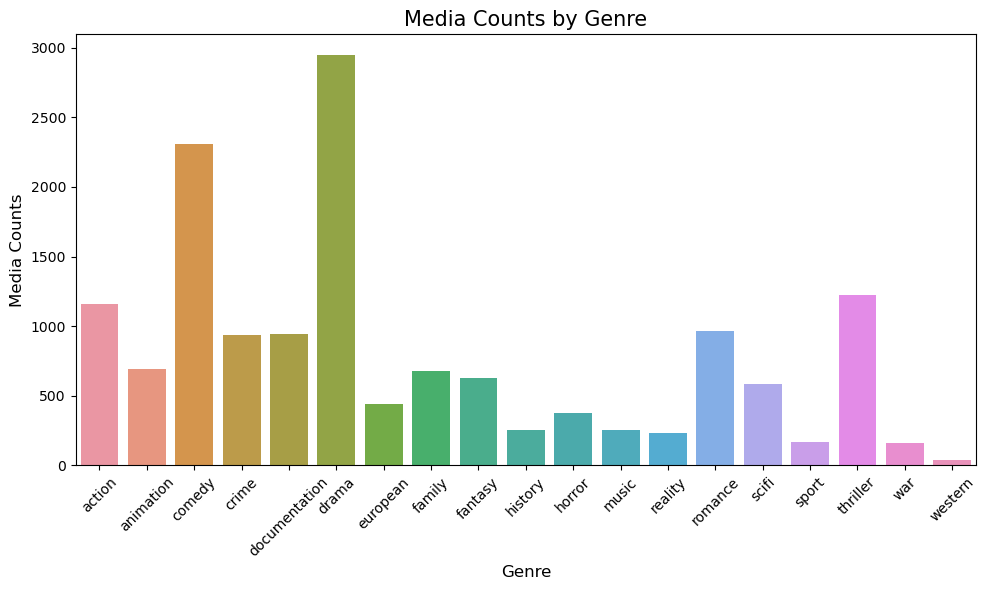

In [42]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns

df = pd.read_csv('/home/CleanedData/genre_encoded_data.csv') 


genre_columns = df.columns[15:]
genre_df = df[genre_columns]

genre_list = [genre_df[col] for col in genre_df.columns]


#print(genre_df)
# make bar chart
sns.reset_orig()
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_df, errorbar=None, estimator=sum)
plt.title('Media Counts by Genre', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Media Counts',fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'/home/Figures/imdb_vs_genre.png')
plt.show()


**Correlation Heatmap**

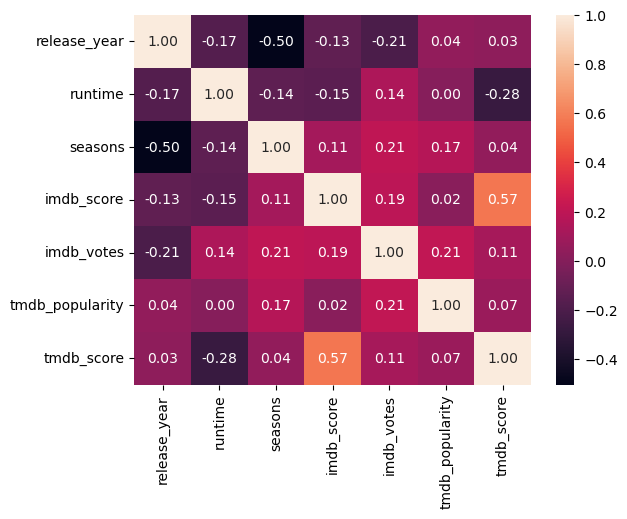

In [43]:
cleaned_title_data = pd.read_csv('/home/OriginalData/titles.csv')

# Create a correlation heatmap for the numeric variables in this dataset
sns.heatmap(cleaned_title_data.corr(numeric_only=True), annot=True, fmt=".2f")
plt.savefig('/home/Figures/corr_heatmap_all.png', bbox_inches='tight')
plt.show()
#print(cleaned_title_data.columns.values.tolist())

### **3. DATA IMPUTATION**

6.6
Coefficients: 
 [[0.52587571]]
Intercept: 
 [2.8825634]
Mean squared error: 0.90
Coefficient of determination: 0.33
const    1.197901e-54
x1       1.271717e-81
Name: P>|t|, dtype: float64


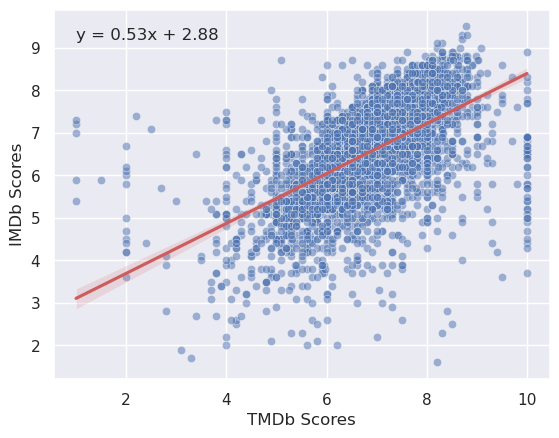

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
import seaborn as sns
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

cleaned_title_data = pd.read_csv('/home/CleanedData/cleaned_title_data.csv')
cleaned_credits_data = pd.read_csv('/home/CleanedData/cleaned_credits_data.csv')

# DATA IMPUTATION 
movie_scores = pd.concat([cleaned_title_data['media_id'], cleaned_title_data['tmdb_score'], cleaned_title_data['imdb_score']], axis=1)

print(movie_scores['imdb_score'].median())

movie_scores_rm_na = movie_scores.dropna()

# Code adapted from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html 
# and from: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 

imdb_scores_Y = list(movie_scores_rm_na['imdb_score'])
tmdb_scores_X = list(movie_scores_rm_na['tmdb_score'])
#print(imdb_scores_Y)

tmdb_scores_X_train, tmdb_scores_X_test, imdb_scores_Y_train, imdb_scores_Y_test = train_test_split(tmdb_scores_X, imdb_scores_Y, test_size=0.8, random_state=1234, shuffle=True)

sns.reset_orig()
sns.set_theme()
ax = sns.scatterplot(x=tmdb_scores_X_test, y=imdb_scores_Y_test, alpha=0.5)
ax.set_xlabel("TMDb Scores")
ax.set_ylabel("IMDb Scores")
sns.regplot(x=tmdb_scores_X_test, y=imdb_scores_Y_test, scatter=False, color="indianred")
slope, intercept = np.polyfit(tmdb_scores_X_train, imdb_scores_Y_train, 1)
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(1, 9.2))




tmdb_scores_X_train = np.array(tmdb_scores_X_train).reshape(-1,1)
tmdb_scores_X_test = np.array(tmdb_scores_X_test).reshape(-1,1)
imdb_scores_Y_train = np.array(imdb_scores_Y_train).reshape(-1,1)
imdb_scores_Y_test = np.array(imdb_scores_Y_test).reshape(-1,1)


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(tmdb_scores_X_train, imdb_scores_Y_train)

# Make predictions using the testing set
imdb_scores_Y_pred = regr.predict(tmdb_scores_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

# The intercept
print("Intercept: \n", regr.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(imdb_scores_Y_test, imdb_scores_Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(imdb_scores_Y_test, imdb_scores_Y_pred))


'''
# Plot outputs
plt.scatter(tmdb_scores_X_test, imdb_scores_Y_test, color="black")
plt.plot(tmdb_scores_X_test, imdb_scores_Y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
'''

tmdb_scores_X_train = sm.add_constant(tmdb_scores_X_train)
model = sm.OLS(imdb_scores_Y_train, tmdb_scores_X_train).fit()

p_values = model.summary2().tables[1]['P>|t|']
print(p_values)

def imdb_score_predictor(x, y):
    if math.isnan(y):
        y = 2.8825634+0.52587571*x
        return y
    else:
        return y


cleaned_title_data_imputed = cleaned_title_data

cleaned_title_data_imputed['imdb_score'] = cleaned_title_data_imputed.apply(lambda x: imdb_score_predictor(x.tmdb_score, x.imdb_score), axis=1)

cleaned_title_data_imputed.dropna(subset=['imdb_score'], inplace=True)

cleaned_title_data_imputed.to_csv('/home/CleanedData/cleaned_title_data_imputed.csv', index = False)



### **4. PREDICTING IMDB SCORES FROM AVERAGE SCORES OF DIRECTORS' OTHER MOVIES**

**a. Is the success of a director's *previous* movies useful in predicting the success of their *future* movies?**

1330
3177
Coefficient: 
 [[0.56776146]]
Intercept: 
 [2.53287889]
Mean squared error: 0.92
Coefficient of determination: 0.22
Average mean squared error: 0.86
Average coefficient of determination: 0.23


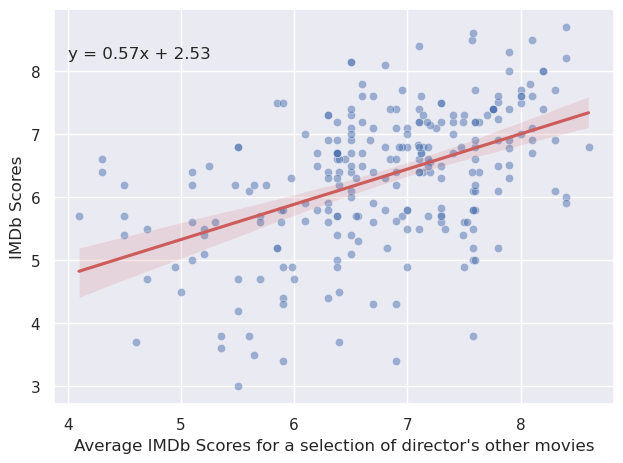

In [45]:
import regex as re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

pd.options.mode.chained_assignment = None  # default='warn'


title_data_df = pd.read_csv('/home/CleanedData/cleaned_title_data_imputed.csv')
credits_data_df = pd.read_csv('/home/CleanedData/cleaned_credits_data.csv')


director_data_df = credits_data_df[credits_data_df['role']=='director']

# Merge our datasets
linked_data = pd.merge(title_data_df, director_data_df, on='media_id', how='left')
linked_data.dropna(subset=['role'], inplace=True)

linked_data = linked_data.sort_values(by=['release_year'], ascending=True)

linked_data_prev = linked_data[linked_data['release_year']<=2016]
linked_data_new = linked_data[linked_data['release_year']>2016]

def run_director_regression(linked_data_prev, linked_data_new, xpos):
    print(len(linked_data_prev))
    print(len(linked_data_new))

    # Count the number of occurences of the director in the first dataset
    director_movie_count = dict()
    for person in linked_data_prev['person_id']:
        if person not in director_movie_count.keys():
            director_movie_count[person] = 1
        else:
            director_movie_count[person] += 1

    movie_count = linked_data_prev['person_id'].apply(lambda x: director_movie_count[x])
    movie_count = movie_count.rename('movie_count') 

    linked_with_count_train = pd.concat([linked_data_prev, movie_count.set_axis(linked_data_prev.index)], axis=1)

    director_movie_total_imdb_score = dict()
    for person, imdb_score in zip(linked_with_count_train['person_id'],linked_with_count_train['imdb_score']):
        if person not in director_movie_total_imdb_score.keys():
            director_movie_total_imdb_score[person] = imdb_score
        else:
            director_movie_total_imdb_score[person] += imdb_score

    imdb_score = linked_with_count_train['person_id'].apply(lambda x: director_movie_total_imdb_score[x])
    imdb_score = imdb_score.rename('imdb_score_total') 

    linked_with_count_train = pd.concat([linked_with_count_train, imdb_score.set_axis(linked_with_count_train.index)], axis=1)

    ave_imdb_score = []
    for movie_count, imdb_score_total in zip(linked_with_count_train['movie_count'],linked_with_count_train['imdb_score_total']):
        average = imdb_score_total/movie_count
        ave_imdb_score.append(round(average,2))

    average_imdb_score = pd.Series(ave_imdb_score)
    average_imdb_score = average_imdb_score.rename('average_imdb_score') 

    # Associate the average scores of each director with each instance of the director in the second dataset
    linked_with_count_train = pd.concat([linked_with_count_train,average_imdb_score.set_axis(linked_with_count_train.index) ], sort=False, axis=1)

    director_rating_train = []
    for director, rating in zip(linked_with_count_train['person_id'], linked_with_count_train['average_imdb_score']):
        temp = (director, rating)
        director_rating_train.append(temp)

    def director_matcher(director, director_rating_train):
        for item in director_rating_train:
            if director == item[0]:
                return item[1]

    linked_data_new['average_imdb_score'] = linked_data_new['person_id'].copy().apply(lambda x: director_matcher(x, director_rating_train))

    correl_director = linked_data_new['imdb_score'].corr(linked_data_new['average_imdb_score'])
    #print(correl_director)


    linked_data_new.dropna(subset=['average_imdb_score'], inplace=True)
    linked_data_new.dropna(subset=['imdb_score'], inplace=True)

    cleaned_title_data = linked_data_new
    movie_scores = pd.concat([linked_data_new['media_id'], linked_data_new['imdb_score'], linked_data_new['average_imdb_score']], axis=1)
    correl_imdb_tmdb = movie_scores['imdb_score'].corr(movie_scores['average_imdb_score'])
    #sns.reset_orig()
    #ax = sns.regplot(data=movie_scores, x="average_imdb_score", y="imdb_score")

    plt.savefig('/home/Figures/imdb_vs_director_imdb_score_over_time.png')

    X = linked_data_new['average_imdb_score'].tolist()
    Y = linked_data_new['imdb_score'].tolist()

    ave_imdb_scores_X_train, ave_imdb_scores_X_test, imdb_scores_Y_train, imdb_scores_Y_test = train_test_split(X, Y, test_size=0.6, random_state=123, shuffle=True)


    # Plot our results here
    #print(ave_imdb_scores_X_train)
    sns.reset_orig()
    sns.set_theme()
    ax = sns.scatterplot(x=ave_imdb_scores_X_test, y=imdb_scores_Y_test, alpha=0.5)
    ax.set_xlabel("Average IMDb Scores for a selection of director's other movies")
    ax.set_ylabel("IMDb Scores")
    sns.regplot(x=ave_imdb_scores_X_test, y=imdb_scores_Y_test, scatter=False, color="indianred")
    slope, intercept = np.polyfit(ave_imdb_scores_X_train, imdb_scores_Y_train, 1)
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=(xpos, 8.2))
    plt.tight_layout()
    plt.show()



    ave_imdb_scores_X_train = np.array(ave_imdb_scores_X_train).reshape(-1,1)
    ave_imdb_scores_X_test = np.array(ave_imdb_scores_X_test).reshape(-1,1)
    imdb_scores_Y_train = np.array(imdb_scores_Y_train).reshape(-1,1)
    imdb_scores_Y_test = np.array(imdb_scores_Y_test).reshape(-1,1)

    regr.fit(ave_imdb_scores_X_train, imdb_scores_Y_train)

    imdb_scores_Y_pred = regr.predict(ave_imdb_scores_X_test)
    
    



    # The coefficient
    print("Coefficient: \n", regr.coef_)

    # The intercept
    print("Intercept: \n", regr.intercept_)

    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(imdb_scores_Y_test, imdb_scores_Y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(imdb_scores_Y_test, imdb_scores_Y_pred))


    # 5 fold cross validation to find an average R^2 and sqrt(MSE)

    from sklearn.model_selection import KFold

    # set n=5 value for n-fold CV
    n = 5
    nf_CV = KFold(n_splits=n, shuffle=True, random_state=123)
    model_accuracy = []

    X = linked_data_new[['average_imdb_score']]
    y = linked_data_new[['imdb_score']]

    X = X.to_numpy() 
    y = y.to_numpy() 

    MSE_list = []
    R_sq_list = []

    for train_idx, test_idx in nf_CV.split(X, y):
        # train-test split
        X_train, X_test = np.asarray(X[train_idx]), np.asarray(X[test_idx])
        y_train, y_test = np.asarray(y[train_idx]), np.asarray(y[test_idx])

        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)

        MSE_list.append(mean_squared_error(y_test, y_pred))
        R_sq_list.append(r2_score(y_test, y_pred))





    # The mean squared error
    print("Average mean squared error: %.2f" % np.mean(MSE_list))
    # The coefficient of determination: 1 is perfect prediction
    print("Average coefficient of determination: %.2f" % np.mean(R_sq_list))
    return

run_director_regression(linked_data_prev, linked_data_new, xpos=4)



1330
3177
Coefficient: 
 [[0.51258452]]
Intercept: 
 [3.14778382]
Mean squared error: 0.95
Coefficient of determination: 0.20
Average mean squared error: 0.91
Average coefficient of determination: 0.22


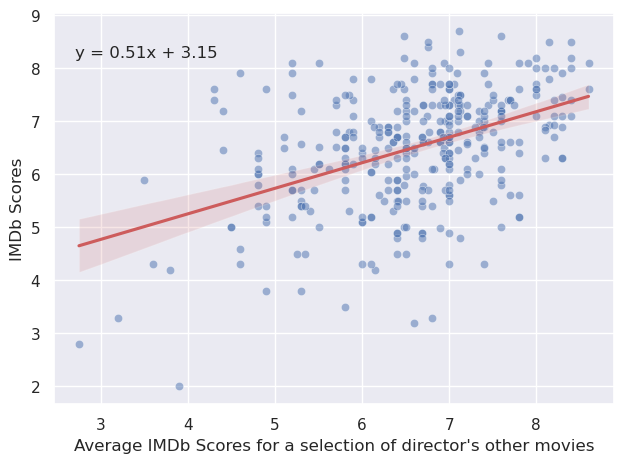

In [46]:
new_df = linked_data.sample(frac=1, random_state=1).reset_index(drop=True)
new_df_1 = new_df[:1330]
new_df_2 = new_df[1330:]
run_director_regression(new_df_1, new_df_2, xpos=2.7)



### **4. PREDICTING IMDB SCORES FROM RUNTIME AND GENRE**

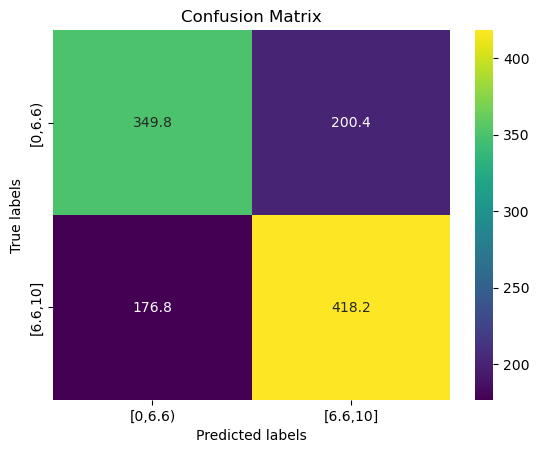

Average Model Accuracy: 0.6706
Average Zero-R Model Accuracy: 0.5196

Average Precision: 0.6646
Average Zero-R Model Precision: 0.0000

Average Recall: 0.6360
Average Zero-R Model Recall: 0.0000

Average F1 Score: 0.6496
Average Zero-R Model F1 Score: 0.0000



In [47]:
import pandas as pd
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_selection import mutual_info_classif

def rating_discretiser_3(score):
    if (0<=score<6.1):
        discretised_score = "[0,6.1)"
    elif (6.1<=score<7.1):
        discretised_score = "[6.1,7.1)"
    else:
        discretised_score = "[7.1,10]"
    return discretised_score


def rating_discretiser_2(score):
    if (0<=score<6.6):
        discretised_score = "[0,6.6)"
    elif (6.6<=score<=10):
        discretised_score = "[6.6,10]"
    return discretised_score

genre_df = pd.read_csv('/home/CleanedData/genre_encoded_data.csv')
genre_df['genres'] = genre_df['genres'].apply(lambda x: re.sub(r"[\[\]' ]", "", x).split(","))

def rm_empty_list(word_list):
    if word_list[0]=='':
        return None
    else: 
        return word_list

genre_df['genres'] = genre_df['genres'].apply(lambda x: rm_empty_list(x))

genre_df = genre_df[genre_df['genres'].notna()]
genre_df = genre_df[genre_df['runtime'].notna()]


genre_list = []

for row in genre_df['genres']:
    for genre in row:
        genre_list.append(genre)
genre_list = list(set(genre_list))



# Remove media which have '0' in all genre cells
genre_df['sum'] = genre_df[genre_list[0]]
for genre in genre_list[1:]:
    genre_df['sum'] += genre_df[genre]

genre_df = genre_df[genre_df['sum']!=0]

genre_df['imdb_score'] = genre_df['imdb_score'].apply(lambda x: rating_discretiser_2(x))


# IMPLEMENT CROSS VALIDATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore')
import numpy as np
from sklearn.feature_selection import mutual_info_classif


def run_knn_genre(genre_df, genre_list):

    X_Y_COLS_ALL = [str(genre) for genre in genre_list]
    X_Y_COLS_ALL.append('imdb_score')
    X_Y_COLS_ALL.append('runtime')
    X_COLS_ALL = [str(genre) for genre in genre_list]
    X_COLS_ALL.append('runtime')
    y_COL = 'imdb_score'
    THRESHOLD = 0.0002


    # set n=5 value for n-fold CV
    n = 5
    nf_CV = KFold(n_splits=n, shuffle=True, random_state=123)
    model_accuracy = []
    baseline_accuracy = []
    model_precision_score = []
    baseline_precision_score = []
    model_recall = []
    baseline_recall = []
    model_f1_score = []
    baseline_f1_score = []

    X = genre_df[X_COLS_ALL]
    X = X.to_numpy() 
    y = genre_df[y_COL]
    y = y.to_numpy() 
    conf_matrix_list_of_arrays = []
    
    for train_idx, test_idx in nf_CV.split(X, y):
        # train-test split
        X_train, X_test = np.asarray(X[train_idx]), np.asarray(X[test_idx])
        y_train, y_test = np.asarray(y[train_idx]), np.asarray(y[test_idx])
        
        # Implement feature selection using MI 
        X_train_df = pd.DataFrame(X_train, columns = [col for col in X_COLS_ALL])
        X_test_df = pd.DataFrame(X_test, columns = [col for col in X_COLS_ALL])

        training_data_Y = pd.DataFrame(y_train, columns = ['imdb_score'])    
        
        # get our features and class label
        features = X_train_df[[c for c in genre_df.columns if c in genre_list]]
        class_label = training_data_Y['imdb_score']
        filtered_features = []
        # we accept features with MI higher than threshold 
        mi_arr = mutual_info_classif(X=features, y=class_label, discrete_features=True)

        removal_list = []
        for feature, mi in zip(features.columns, mi_arr):
            if(mi >= THRESHOLD): 
                filtered_features.append(feature)
            else:
                removal_list.append(feature)    
        

        # Update the training set so that only the filtered genres are used 
        X_train = pd.concat([X_train_df[filtered_features], X_train_df['runtime']], axis=1)
        X_test = pd.concat([X_test_df[filtered_features], X_test_df['runtime']], axis=1)
        X_train = X_train.to_numpy() 
        X_test = X_test.to_numpy()

        # Preprocessing
        # 1. Standardise the data
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # Training
        knn = KNN(n_neighbors=25)
        knn.fit(X_train, y_train)    
        
        # Predictions
        y_pred = knn.predict(X_test)
        model_accuracy.append(accuracy_score(y_test, y_pred))
        model_precision_score.append(precision_score(y_test, y_pred, pos_label = '[0,6.6)'))
        model_recall.append(recall_score(y_test, y_pred, pos_label = '[0,6.6)'))
        model_f1_score.append(f1_score(y_test, y_pred, pos_label = '[0,6.6)'))

        # Confusion matrix averaging obtained from https://stackoverflow.com/questions/40057049/using-confusion-matrix-as-scoring-metric-in-cross-validation-in-scikit-learn 
        conf_matrix = confusion_matrix(y_test, y_pred, labels=['[0,6.6)', '[6.6,10]'])
        conf_matrix_list_of_arrays.append(conf_matrix)
        

        # https://stackoverflow.com/questions/28663856/how-do-i-count-the-occurrence-of-a-certain-item-in-an-ndarray
        unique, counts = np.unique(y_train, return_counts=True)
        rating_freq_dict = dict(zip(unique, counts))
        rating_freq = [(k,v) for k,v in rating_freq_dict.items()]
        rating_freq = sorted(rating_freq, key=lambda x: x[1], reverse=True)
        baseline_prediction = rating_freq[0][0]
        y_pred_baseline = [baseline_prediction for i in range(0,len(y_pred))]

        baseline_accuracy.append(accuracy_score(y_test, y_pred_baseline))
        baseline_precision_score.append(precision_score(y_test, y_pred_baseline, pos_label = '[0,6.6)'))
        baseline_recall.append(recall_score(y_test, y_pred_baseline, pos_label = '[0,6.6)'))
        baseline_f1_score.append(f1_score(y_test, y_pred_baseline, pos_label = '[0,6.6)'))



    cm = np.mean(conf_matrix_list_of_arrays, axis=0)

    sns.reset_orig()
    # https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels 
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="viridis");  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['[0,6.6)', '[6.6,10]']); ax.yaxis.set_ticklabels(['[0,6.6)', '[6.6,10]']);
    sns.color_palette("viridis", as_cmap=True)
    plt.show()


    print(f"Average Model Accuracy: {np.mean(model_accuracy):.4f}")
    print(f"Average Zero-R Model Accuracy: {np.mean(baseline_accuracy):.4f}\n")

    print(f"Average Precision: {np.mean(model_precision_score):.4f}")
    print(f"Average Zero-R Model Precision: {np.mean(baseline_precision_score):.4f}\n")

    print(f"Average Recall: {np.mean(model_recall):.4f}")
    print(f"Average Zero-R Model Recall: {np.mean(baseline_recall):.4f}\n")

    print(f"Average F1 Score: {np.mean(model_f1_score):.4f}")
    print(f"Average Zero-R Model F1 Score: {np.mean(baseline_f1_score):.4f}\n")

run_knn_genre(genre_df, genre_list)

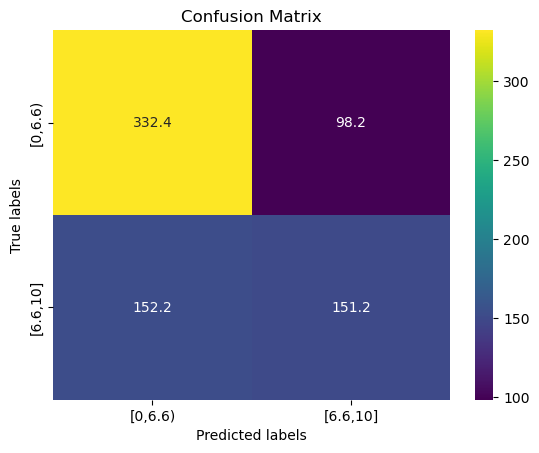

Average Model Accuracy: 0.6589
Average Zero-R Model Accuracy: 0.5866

Average Precision: 0.6860
Average Zero-R Model Precision: 0.5866

Average Recall: 0.7720
Average Zero-R Model Recall: 1.0000

Average F1 Score: 0.7263
Average Zero-R Model F1 Score: 0.7394

Average Model Accuracy: 0.7223
Average Zero-R Model Accuracy: 0.7092

Average Precision: 0.5607
Average Zero-R Model Precision: 0.0000

Average Recall: 0.2068
Average Zero-R Model Recall: 0.0000

Average F1 Score: 0.2996
Average Zero-R Model F1 Score: 0.0000



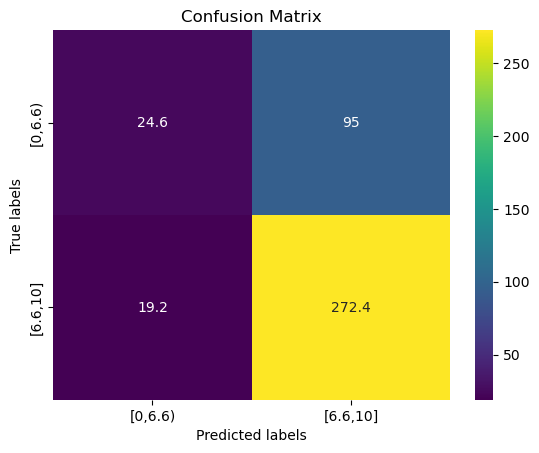

In [48]:
genre_df_movies = genre_df[genre_df['media_type']=='movie']
run_knn_genre(genre_df_movies, genre_list)

genre_df_shows = genre_df[genre_df['media_type']=='show']
run_knn_genre(genre_df_shows, genre_list)

